<a href="https://colab.research.google.com/github/xiaochengJF/DeepLearning/blob/master/Course_5_Week_2_%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
cd /content/gdrive/My Drive/DL-GPU/DeepLearning/Course 5 - Week 2 作业/

/content/gdrive/My Drive/DL-GPU/DeepLearning/Course 5 - Week 2 作业


In [0]:
#@title 默认标题文本
import numpy as np
import w2v_utils

In [0]:
words, word_to_vec_map = w2v_utils.read_glove_vecs('data/glove.6B.50d.txt')

In [45]:
# python 3.x
print(word_to_vec_map['hello'])

[-0.38497   0.80092   0.064106 -0.28355  -0.026759 -0.34532  -0.64253
 -0.11729  -0.33257   0.55243  -0.087813  0.9035    0.47102   0.56657
  0.6985   -0.35229  -0.86542   0.90573   0.03576  -0.071705 -0.12327
  0.54923   0.47005   0.35572   1.2611   -0.67581  -0.94983   0.68666
  0.3871   -1.3492    0.63512   0.46416  -0.48814   0.83827  -0.9246
 -0.33722   0.53741  -1.0616   -0.081403 -0.67111   0.30923  -0.3923
 -0.55002  -0.68827   0.58049  -0.11626   0.013139 -0.57654   0.048833
  0.67204 ]


In [0]:
def cosine_similarity(u, v):
    """
    u与v的余弦相似度反映了u与v的相似程度
    
    参数：
        u -- 维度为(n,)的词向量
        v -- 维度为(n,)的词向量
        
    返回：
        cosine_similarity -- 由上面公式定义的u和v之间的余弦相似度。
    """
    distance = 0
    
    # 计算u与v的内积
    dot = np.dot(u, v)
    
    #计算u的L2范数
    norm_u = np.sqrt(np.sum(np.power(u, 2)))
    
    #计算v的L2范数
    norm_v = np.sqrt(np.sum(np.power(v, 2)))
    
    # 根据公式1计算余弦相似度
    cosine_similarity = np.divide(dot, norm_u * norm_v)
    
    return cosine_similarity

In [47]:
father = word_to_vec_map["father"]
mother = word_to_vec_map["mother"]
ball = word_to_vec_map["ball"]
crocodile = word_to_vec_map["crocodile"]
france = word_to_vec_map["france"]
italy = word_to_vec_map["italy"]
paris = word_to_vec_map["paris"]
rome = word_to_vec_map["rome"]

print("cosine_similarity(father, mother) = ", cosine_similarity(father, mother))
print("cosine_similarity(ball, crocodile) = ",cosine_similarity(ball, crocodile))
print("cosine_similarity(france - paris, rome - italy) = ",cosine_similarity(france - paris, rome - italy))

cosine_similarity(father, mother) =  0.8909038442893615
cosine_similarity(ball, crocodile) =  0.2743924626137942
cosine_similarity(france - paris, rome - italy) =  -0.6751479308174201


In [0]:
def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    """
    解决“A与B相比就类似于C与____相比一样”之类的问题
    
    参数：
        word_a -- 一个字符串类型的词
        word_b -- 一个字符串类型的词
        word_c -- 一个字符串类型的词
        word_to_vec_map -- 字典类型，单词到GloVe向量的映射
        
    返回：
        best_word -- 满足(v_b - v_a) 最接近 (v_best_word - v_c) 的词
    """
    
    # 把单词转换为小写
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    # 获取对应单词的词向量
    e_a, e_b, e_c = word_to_vec_map[word_a], word_to_vec_map[word_b], word_to_vec_map[word_c]
    
    # 获取全部的单词
    words = word_to_vec_map.keys()
    
    # 将max_cosine_sim初始化为一个比较大的负数
    max_cosine_sim = -100
    best_word = None
    
    # 遍历整个数据集
    for word in words:
        # 要避免匹配到输入的数据
        if word in [word_a, word_b, word_c]:
            continue
        # 计算余弦相似度
        cosine_sim = cosine_similarity((e_b - e_a), (word_to_vec_map[word] - e_c))
        
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = word
            
    return best_word

In [49]:
triads_to_try = [('italy', 'italian', 'spain'), ('india', 'delhi', 'japan'), ('man', 'woman', 'boy'), ('small', 'smaller', 'large')]
for triad in triads_to_try:
    print ('{} -> {} <====> {} -> {}'.format( *triad, complete_analogy(*triad,word_to_vec_map)))

italy -> italian <====> spain -> spanish
india -> delhi <====> japan -> tokyo
man -> woman <====> boy -> girl
small -> smaller <====> large -> larger


In [50]:
triads_to_try = [('small', 'smaller', 'big')]
for triad in triads_to_try:
    print ('{} -> {} <====> {} -> {}'.format( *triad, complete_analogy(*triad,word_to_vec_map)))

small -> smaller <====> big -> competitors


In [51]:
g = word_to_vec_map['woman'] - word_to_vec_map['man']
print(g)

[-0.087144    0.2182     -0.40986    -0.03922    -0.1032      0.94165
 -0.06042     0.32988     0.46144    -0.35962     0.31102    -0.86824
  0.96006     0.01073     0.24337     0.08193    -1.02722    -0.21122
  0.695044   -0.00222     0.29106     0.5053     -0.099454    0.40445
  0.30181     0.1355     -0.0606     -0.07131    -0.19245    -0.06115
 -0.3204      0.07165    -0.13337    -0.25068714 -0.14293    -0.224957
 -0.149       0.048882    0.12191    -0.27362    -0.165476   -0.20426
  0.54376    -0.271425   -0.10245    -0.32108     0.2516     -0.33455
 -0.04371     0.01258   ]


In [52]:
name_list = ['john', 'marie', 'sophie', 'ronaldo', 'priya', 'rahul', 'danielle', 'reza', 'katy', 'yasmin']

for w in name_list:
    print (w, cosine_similarity(word_to_vec_map[w], g))

john -0.23163356145973724
marie 0.315597935396073
sophie 0.31868789859418784
ronaldo -0.31244796850329437
priya 0.17632041839009402
rahul -0.16915471039231716
danielle 0.24393299216283895
reza -0.07930429672199553
katy 0.2831068659572615
yasmin 0.23313857767928758


In [53]:
word_list = ['lipstick', 'guns', 'science', 'arts', 'literature', 'warrior','doctor', 'tree', 'receptionist', 
             'technology',  'fashion', 'teacher', 'engineer', 'pilot', 'computer', 'singer']
for w in word_list:
    print (w, cosine_similarity(word_to_vec_map[w], g))

lipstick 0.2769191625638267
guns -0.1888485567898898
science -0.06082906540929701
arts 0.008189312385880337
literature 0.06472504433459932
warrior -0.20920164641125288
doctor 0.11895289410935041
tree -0.07089399175478091
receptionist 0.33077941750593737
technology -0.13193732447554302
fashion 0.03563894625772699
teacher 0.17920923431825664
engineer -0.0803928049452407
pilot 0.0010764498991916937
computer -0.10330358873850498
singer 0.1850051813649629


In [0]:
def neutralize(word, g, word_to_vec_map):
    """
    通过将“word”投影到与偏置轴正交的空间上，消除了“word”的偏差。
    该函数确保“word”在性别的子空间中的值为0
    
    参数：
        word -- 待消除偏差的字符串
        g -- 维度为(50,)，对应于偏置轴（如性别）
        word_to_vec_map -- 字典类型，单词到GloVe向量的映射
        
    返回：
        e_debiased -- 消除了偏差的向量。
    """
    
    # 根据word选择对应的词向量
    e = word_to_vec_map[word]
    
    # 根据公式2计算e_biascomponent
    e_biascomponent = np.divide(np.dot(e, g), np.square(np.linalg.norm(g))) * g
    
    # 根据公式3计算e_debiased
    e_debiased = e - e_biascomponent
    
    return e_debiased

In [55]:
e = "receptionist"
print("去偏差前{0}与g的余弦相似度为：{1}".format(e, cosine_similarity(word_to_vec_map["receptionist"], g)))

e_debiased = neutralize("receptionist", g, word_to_vec_map)
print("去偏差后{0}与g的余弦相似度为：{1}".format(e, cosine_similarity(e_debiased, g)))

去偏差前receptionist与g的余弦相似度为：0.33077941750593737
去偏差后receptionist与g的余弦相似度为：-2.099120994400013e-17


In [0]:
def equalize(pair, bias_axis, word_to_vec_map):
    """
    通过遵循上图中所描述的均衡方法来消除性别偏差。
    
    参数：
        pair -- 要消除性别偏差的词组，比如 ("actress", "actor") 
        bias_axis -- 维度为(50,)，对应于偏置轴（如性别）
        word_to_vec_map -- 字典类型，单词到GloVe向量的映射
    
    返回：
        e_1 -- 第一个词的词向量
        e_2 -- 第二个词的词向量
    """
    # 第1步：获取词向量
    w1, w2 = pair
    e_w1, e_w2 = word_to_vec_map[w1], word_to_vec_map[w2]
    
    # 第2步：计算w1与w2的均值
    mu = (e_w1 + e_w2) / 2.0
    
    # 第3步：计算mu在偏置轴与正交轴上的投影
    mu_B = np.divide(np.dot(mu, bias_axis), np.square(np.linalg.norm(bias_axis))) * bias_axis
    mu_orth = mu - mu_B
    
    # 第4步：使用公式7、8计算e_w1B 与 e_w2B
    e_w1B = np.divide(np.dot(e_w1, bias_axis), np.square(np.linalg.norm(bias_axis))) * bias_axis
    e_w2B = np.divide(np.dot(e_w2, bias_axis), np.square(np.linalg.norm(bias_axis))) * bias_axis
    
    # 第5步：根据公式9、10调整e_w1B 与 e_w2B的偏置部分
    corrected_e_w1B = np.sqrt(np.abs(1-np.square(np.linalg.norm(mu_orth)))) * np.divide(e_w1B-mu_B, np.abs(e_w1 - mu_orth - mu_B))
    corrected_e_w2B = np.sqrt(np.abs(1-np.square(np.linalg.norm(mu_orth)))) * np.divide(e_w2B-mu_B, np.abs(e_w2 - mu_orth - mu_B))
    
    # 第6步： 使e1和e2等于它们修正后的投影之和，从而消除偏差
    e1 = corrected_e_w1B + mu_orth
    e2 = corrected_e_w2B + mu_orth
    
    return e1, e2

In [57]:
print("==========均衡校正前==========")
print("cosine_similarity(word_to_vec_map[\"man\"], gender) = ", cosine_similarity(word_to_vec_map["man"], g))
print("cosine_similarity(word_to_vec_map[\"woman\"], gender) = ", cosine_similarity(word_to_vec_map["woman"], g))
e1, e2 = equalize(("man", "woman"), g, word_to_vec_map)
print("\n==========均衡校正后==========")
print("cosine_similarity(e1, gender) = ", cosine_similarity(e1, g))
print("cosine_similarity(e2, gender) = ", cosine_similarity(e2, g))

==========均衡校正前==========
cosine_similarity(word_to_vec_map["man"], gender) =  -0.11711095765336832
cosine_similarity(word_to_vec_map["woman"], gender) =  0.35666618846270376

==========均衡校正后==========
cosine_similarity(e1, gender) =  -0.7165727525843935
cosine_similarity(e2, gender) =  0.7396596474928909


In [58]:
!pip install emoji

In [0]:
import numpy as np
import emo_utils
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
X_train, Y_train = emo_utils.read_csv('data/train_emoji.csv')
X_test, Y_test = emo_utils.read_csv('data/test.csv')

max_Len = len(max(X_train, key=len).split())

In [89]:
index  = 3
print(X_train[index], emo_utils.label_to_emoji(Y_train[index]))

Miss you so much ❤️


In [0]:
Y_oh_train = emo_utils.convert_to_one_hot(Y_train, C=5)
Y_oh_test = emo_utils.convert_to_one_hot(Y_test, C=5)

In [91]:
index = 0 
print("{0}对应的独热编码是{1}".format(Y_train[index], Y_oh_train[index]))

3对应的独热编码是[0. 0. 0. 1. 0.]


In [0]:
word_to_index, index_to_word, word_to_vec_map = emo_utils.read_glove_vecs('data/glove.6B.50d.txt')

In [93]:
word = "cucumber"
index = 113317
print("单词{0}对应的索引是：{1}".format(word, word_to_index[word]))
print("索引{0}对应的单词是：{1}".format(index, index_to_word[index]))

单词cucumber对应的索引是：113317
索引113317对应的单词是：cucumber


In [0]:
def sentence_to_avg(sentence, word_to_vec_map):
    """
    将句子转换为单词列表，提取其GloVe向量，然后将其平均。
    
    参数：
        sentence -- 字符串类型，从X中获取的样本。
        word_to_vec_map -- 字典类型，单词映射到50维的向量的字典
        
    返回：
        avg -- 对句子的均值编码，维度为(50,)
    """
    
    # 第一步：分割句子，转换为列表。
    words = sentence.lower().split()
    
    # 初始化均值词向量
    avg = np.zeros(50,)
    
    # 第二步：对词向量取平均。
    for w in words:
        avg += word_to_vec_map[w]
    avg = np.divide(avg, len(words))
    
    return avg

In [95]:
avg = sentence_to_avg("Morrocan couscous is my favorite dish", word_to_vec_map)
print("avg = ", avg)

avg =  [-0.008005    0.56370833 -0.50427333  0.258865    0.55131103  0.03104983
 -0.21013718  0.16893933 -0.09590267  0.141784   -0.15708967  0.18525867
  0.6495785   0.38371117  0.21102167  0.11301667  0.02613967  0.26037767
  0.05820667 -0.01578167 -0.12078833 -0.02471267  0.4128455   0.5152061
  0.38756167 -0.898661   -0.535145    0.33501167  0.68806933 -0.2156265
  1.797155    0.10476933 -0.36775333  0.750785    0.10282583  0.348925
 -0.27262833  0.66768    -0.10706167 -0.283635    0.59580117  0.28747333
 -0.3366635   0.23393817  0.34349183  0.178405    0.1166155  -0.076433
  0.1445417   0.09808667]


In [0]:
def model(X, Y, word_to_vec_map, learning_rate=0.01, num_iterations=400):
    """
    在numpy中训练词向量模型。
    
    参数：
        X -- 输入的字符串类型的数据，维度为(m, 1)。
        Y -- 对应的标签，0-7的数组，维度为(m, 1)。
        word_to_vec_map -- 字典类型的单词到50维词向量的映射。
        learning_rate -- 学习率.
        num_iterations -- 迭代次数。
        
    返回：
        pred -- 预测的向量，维度为(m, 1)。
        W -- 权重参数，维度为(n_y, n_h)。
        b -- 偏置参数，维度为(n_y,)
    """
    np.random.seed(1)
    
    # 定义训练数量
    m = Y.shape[0]
    n_y = 5
    n_h = 50
    
    # 使用Xavier初始化参数
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    # 将Y转换成独热编码
    Y_oh = emo_utils.convert_to_one_hot(Y, C=n_y)
    
    # 优化循环
    for t in range(num_iterations):
        for i in range(m):
            # 获取第i个训练样本的均值
            avg = sentence_to_avg(X[i], word_to_vec_map)
            
            # 前向传播
            z = np.dot(W, avg) + b
            a = emo_utils.softmax(z)
            
            # 计算第i个训练的损失
            cost = -np.sum(Y_oh[i]*np.log(a))
            
            # 计算梯度
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz
            
            # 更新参数
            W = W - learning_rate * dW
            b = b - learning_rate * db
        if t % 100 == 0:
            print("第{t}轮，损失为{cost}".format(t=t,cost=cost))
            pred = emo_utils.predict(X, Y, W, b, word_to_vec_map)
            
    return pred, W, b

In [97]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(X_train[0])
print(type(X_train))
Y = np.asarray([5,0,0,5, 4, 4, 4, 6, 6, 4, 1, 1, 5, 6, 6, 3, 6, 3, 4, 4])
print(Y.shape)

X = np.asarray(['I am going to the bar tonight', 'I love you', 'miss you my dear',
 'Lets go party and drinks','Congrats on the new job','Congratulations',
 'I am so happy for you', 'Why are you feeling bad', 'What is wrong with you',
 'You totally deserve this prize', 'Let us go play football',
 'Are you down for football this afternoon', 'Work hard play harder',
 'It is suprising how people can be dumb sometimes',
 'I am very disappointed','It is the best day in my life',
 'I think I will end up alone','My life is so boring','Good job',
 'Great so awesome'])

(132,)
(132,)
(132, 5)
never talk to me again
<class 'numpy.ndarray'>
(20,)


In [98]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)

第0轮，损失为1.9520498812810076
Accuracy: 0.3484848484848485
第100轮，损失为0.07971818726014794
Accuracy: 0.9318181818181818
第200轮，损失为0.04456369243681402
Accuracy: 0.9545454545454546
第300轮，损失为0.03432267378786059
Accuracy: 0.9696969696969697


In [99]:
print("=====训练集====")
pred_train = emo_utils.predict(X_train, Y_train, W, b, word_to_vec_map)
print("=====测试集====")
pred_test = emo_utils.predict(X_test, Y_test, W, b, word_to_vec_map)

=====训练集====
Accuracy: 0.9772727272727273
=====测试集====
Accuracy: 0.8571428571428571


In [100]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "you are not happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = emo_utils.predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
emo_utils.print_predictions(X_my_sentences, pred)

Accuracy: 0.8333333333333334

i adore you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
you are not happy ❤️


 	 ❤️ 	 ⚾ 	 😄 	 😞 	 🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            2    0   16    0    0   18
3            1    1    2   12    0   16
4            0    0    1    0    6    7
All          9    9   19   13    6   56


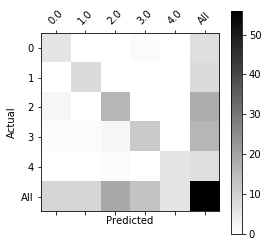

In [101]:
print(" \t {0} \t {1} \t {2} \t {3} \t {4}".format(emo_utils.label_to_emoji(0), emo_utils.label_to_emoji(1), \
                                                 emo_utils.label_to_emoji(2), emo_utils.label_to_emoji(3), \
                                                 emo_utils.label_to_emoji(4)))
import pandas as pd
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
emo_utils.plot_confusion_matrix(Y_test, pred_test)

In [0]:
import numpy as np
np.random.seed(0)
import keras
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

np.random.seed(1)
from keras.initializers import glorot_uniform

In [0]:
def sentences_to_indices(X, word_to_index, max_len):
    """
    输入的是X（字符串类型的句子的数组），再转化为对应的句子列表，
    输出的是能够让Embedding()函数接受的列表或矩阵（参见图4）。
    
    参数：
        X -- 句子数组，维度为(m, 1)
        word_to_index -- 字典类型的单词到索引的映射
        max_len -- 最大句子的长度，数据集中所有的句子的长度都不会超过它。
        
    返回：
        X_indices -- 对应于X中的单词索引数组，维度为(m, max_len)
    """
    
    m = X.shape[0]  # 训练集数量
    # 使用0初始化X_indices
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):
        # 将第i个居住转化为小写并按单词分开。
        sentences_words = X[i].lower().split()
        
        # 初始化j为0
        j = 0
        
        # 遍历这个单词列表
        for w in sentences_words:
            # 将X_indices的第(i, j)号元素为对应的单词索引
            X_indices[i, j] = word_to_index[w]
            
            j += 1
            
    return X_indices

In [104]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 5)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices = [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


In [0]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    创建Keras Embedding()层，加载已经训练好了的50维GloVe向量
    
    参数：
        word_to_vec_map -- 字典类型的单词与词嵌入的映射
        word_to_index -- 字典类型的单词到词汇表（400,001个单词）的索引的映射。
        
    返回：
        embedding_layer() -- 训练好了的Keras的实体层。
    """
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["cucumber"].shape[0]
    
    # 初始化嵌入矩阵
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    # 将嵌入矩阵的每行的“index”设置为词汇“index”的词向量表示
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]
    
    # 定义Keras的embbeding层
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)
    
    # 构建embedding层。
    embedding_layer.build((None,))
    
    # 将嵌入层的权重设置为嵌入矩阵。
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [106]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][3] =", embedding_layer.get_weights()[0][1][3])

weights[0][1][3] = -0.3403


In [0]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    """
    实现Emojify-V2模型的计算图
    
    参数：
        input_shape -- 输入的维度，通常是(max_len,)
        word_to_vec_map -- 字典类型的单词与词嵌入的映射。
        word_to_index -- 字典类型的单词到词汇表（400,001个单词）的索引的映射。
    
    返回：
        model -- Keras模型实体
    """
    # 定义sentence_indices为计算图的输入，维度为(input_shape,)，类型为dtype 'int32' 
    sentence_indices = Input(input_shape, dtype='int32')
    
    # 创建embedding层
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    # 通过嵌入层传播sentence_indices，你会得到嵌入的结果
    embeddings = embedding_layer(sentence_indices)
    
    # 通过带有128维隐藏状态的LSTM层传播嵌入
    # 需要注意的是，返回的输出应该是一批序列。
    X = LSTM(128, return_sequences=True)(embeddings)
    # 使用dropout，概率为0.5
    X = Dropout(0.5)(X)
    # 通过另一个128维隐藏状态的LSTM层传播X
    # 注意，返回的输出应该是单个隐藏状态，而不是一组序列。
    X = LSTM(128, return_sequences=False)(X)
    # 使用dropout，概率为0.5
    X = Dropout(0.5)(X)
    # 通过softmax激活的Dense层传播X，得到一批5维向量。
    X = Dense(5)(X)
    # 添加softmax激活
    X = Activation('softmax')(X)
    
    # 创建模型实体
    model = Model(inputs=sentence_indices, outputs=X)
    
    return model

In [108]:
model = Emojify_V2((max_Len,), word_to_vec_map, word_to_index)
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = emo_utils.convert_to_one_hot(Y_train, C = 5)

In [0]:
model.fit(X_train_indices, Y_train_oh, epochs = 50, batch_size = 32, shuffle=True)

In [112]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = emo_utils.convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)

print("Test accuracy = ", acc)

56/56 [==============================] - 0s 4ms/step
Test accuracy =  0.8928571343421936


In [113]:
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('正确表情：'+ emo_utils.label_to_emoji(Y_test[i]) + '   预测结果： '+ X_test[i] + emo_utils.label_to_emoji(num).strip())

正确表情：😄   预测结果： she got me a nice present	❤️
正确表情：😞   预测结果： work is hard	😄
正确表情：😞   预测结果： This girl is messing with me	❤️
正确表情：❤️   预测结果： I love taking breaks	😞
正确表情：😄   预测结果： you brighten my day	❤️
正确表情：😄   预测结果： will you be my valentine	❤️


In [114]:
x_test = np.array(['you are so beautiful'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  emo_utils.label_to_emoji(np.argmax(model.predict(X_test_indices))))

you are so beautiful ❤️
